In [52]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

**Data preparation**

In [53]:
data = pd.read_csv("train.csv")

In [54]:
#sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [55]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[5.260000e+02 6.429560e+05 7.371750e+05 ... 5.700000e+01 7.200000e+01
  3.286980e+05]
 [3.140000e+02 6.474700e+05 7.562350e+05 ... 8.100000e+01 1.130000e+02
  3.544095e+05]
 [1.970000e+02 5.858090e+05 7.089700e+05 ... 9.100000e+01 8.300000e+01
  3.448205e+05]
 ...
 [4.770000e+02 6.404610e+05 7.863480e+05 ... 7.400000e+01 1.250000e+02
  1.353090e+05]
 [3.480000e+02 5.931970e+05 8.347880e+05 ... 9.100000e+01 1.210000e+02
  3.163875e+05]
 [3.960000e+02 5.775400e+05 7.914770e+05 ... 6.500000e+01 8.100000e+01
  4.298375e+05]], shape=(1000, 12), dtype=float32)


In [56]:
X = tensor_data[:,3:-1]
print(X.shape)

(1000, 8)


In [57]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
print(y[:5])

tf.Tensor(
[[328698. ]
 [354409.5]
 [344820.5]
 [257565.5]
 [422439.5]], shape=(5, 1), dtype=float32)


In [58]:
normalizer = Normalization(mean=5, variance=4)
x_normalized = tf.constant([[3,4,5,6,7]])
normalizer(x_normalized)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[-1. , -0.5,  0. ,  0.5,  1. ]], dtype=float32)>

In [59]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [60]:
x_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape, y_train.shape)

(800, 8) (800, 1)


In [61]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [62]:
for x1,y1 in train_dataset:
    print(x,y1)
    break

tf.Tensor(
[[7.00000e+00 1.40740e+05 3.00000e+00 8.00000e+00 1.10000e+01 1.76000e+02
  1.12000e+02 1.29000e+02]
 [5.00000e+00 6.88110e+04 5.00000e+00 2.00000e+00 1.20000e+01 1.52000e+02
  6.30000e+01 9.30000e+01]
 [6.00000e+00 1.22747e+05 5.00000e+00 7.00000e+00 1.30000e+01 1.49000e+02
  6.30000e+01 1.07000e+02]
 [6.00000e+00 7.44440e+04 5.00000e+00 3.00000e+00 8.00000e+00 1.88000e+02
  8.00000e+01 7.90000e+01]
 [4.00000e+00 6.95580e+04 2.00000e+00 2.00000e+00 1.00000e+01 1.40000e+02
  6.60000e+01 1.15000e+02]
 [4.00000e+00 1.19637e+05 1.00000e+00 7.00000e+00 1.40000e+01 1.46000e+02
  5.90000e+01 1.36000e+02]
 [3.00000e+00 1.46540e+05 3.00000e+00 7.00000e+00 9.00000e+00 1.64000e+02
  6.30000e+01 9.20000e+01]
 [3.00000e+00 6.06660e+04 4.00000e+00 1.00000e+00 9.00000e+00 1.46000e+02
  1.07000e+02 1.25000e+02]
 [6.00000e+00 1.39432e+05 5.00000e+00 1.00000e+00 1.10000e+01 1.68000e+02
  1.17000e+02 1.23000e+02]
 [4.00000e+00 9.11300e+04 4.00000e+00 8.00000e+00 1.10000e+01 1.65000e+02
  7.90

In [63]:
x_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape, y_val.shape)

(100, 8) (100, 1)


In [64]:
val_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [65]:
x_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_val.shape, y_val.shape)

(100, 8) (100, 1)


In [66]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [67]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.81303746, -0.35060212, -1.4165313 , -0.21974364,  0.1549927 ,
         0.15751879, -1.3797644 , -1.4565487 ],
       [ 0.81303746, -0.40657136,  0.6911407 ,  0.48626116,  1.0470374 ,
        -1.3408216 , -0.20783377,  0.46791443],
       [ 0.23125795, -0.8211278 ,  1.3936981 , -0.21974364,  0.60101503,
        -0.2558165 ,  0.2804707 , -0.9402293 ],
       [ 1.394817  ,  0.8238601 ,  0.6911407 , -0.21974364, -1.6290966 ,
         0.98418933, -0.01251198,  1.0311719 ],
       [-1.5140806 , -0.40238738, -0.713974  ,  1.5452684 , -1.6290966 ,
         1.5008584 , -0.45198599,  0.84341943]], dtype=float32)>

In [68]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),normalizer, Dense(128, activation = "relu"),
                                            Dense(128, activation = "relu"),
                                            Dense(128, activation = "relu"),
                                            Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________

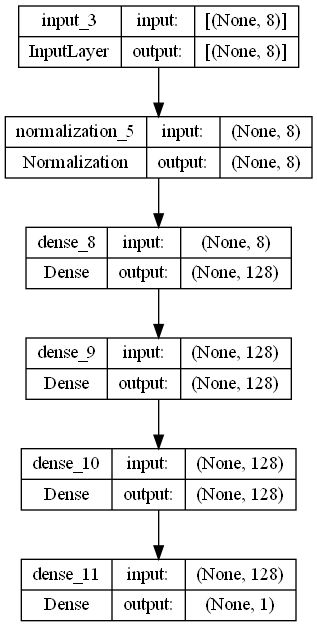

In [69]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [70]:
model.compile(optimizer=Adam(learning_rate=.1), loss=MeanAbsoluteError(), metrics=RootMeanSquaredError())

In [71]:
history = model.fit(train_dataset, validation_data=(val_dataset), epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 141420.7344 - root_mean_squared_error: 193303.2344 - val_loss: 61553.0117 - val_root_mean_squared_error: 74290.4688
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 53787.5469 - root_mean_squared_error: 66699.2266 - val_loss: 52652.6406 - val_root_mean_squared_error: 63655.9844
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 49427.9141 - root_mean_squared_error: 61348.3750 - val_loss: 48115.0352 - val_root_mean_squared_error: 58567.2188
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 42886.3047 - root_mean_squared_error: 52857.7656 - val_loss: 37673.6758 - val_root_mean_squared_error: 46537.1641
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 41619.2852 - root_mean_squared_error: 51832.7148 - val_loss: 38697.9844 - val_root_mean_squared_error: 48105.9531
Epoch 6/100
25/25 [==============================] - 0s 3ms/st

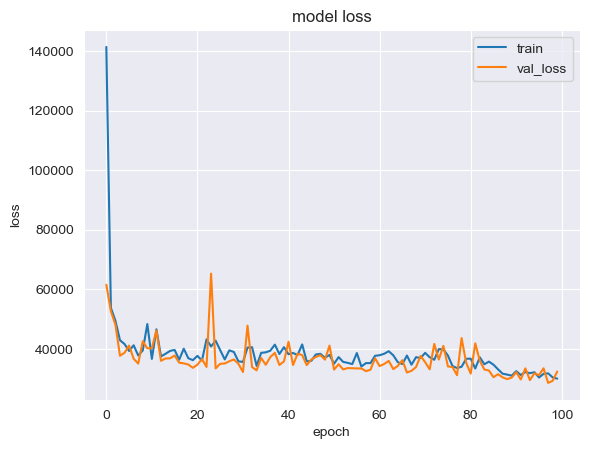

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

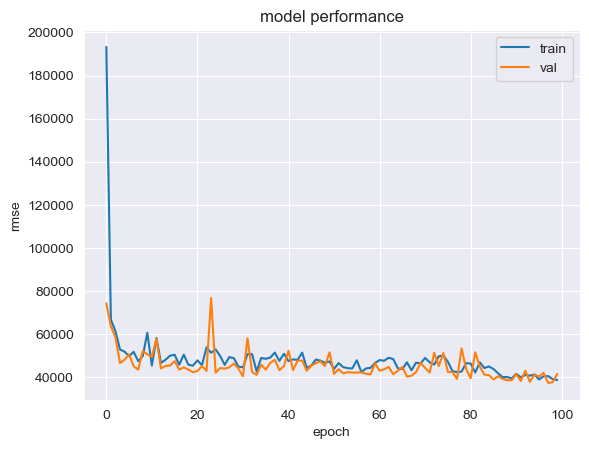

In [73]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [74]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 41662.5859 - root_mean_squared_error: 53152.3203


[41662.5859375, 53152.3203125]

In [75]:
x_test.shape

TensorShape([100, 8])

In [76]:
model.predict(tf.expand_dims(x_test[0], axis=0))


1/1 [==============================] - 0s 141ms/step


array([[213136.55]], dtype=float32)

In [77]:
y_true = list(y_test[:,0].numpy())

In [78]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 2ms/step
[213136.53, 219035.28, 225771.55, 293035.06, 148049.81, 175131.69, 158587.0, 296603.06, 479016.28, 300894.03, 133502.03, 179904.0, 347015.3, 235120.9, 218048.53, 243914.39, 460316.06, 275215.44, 430961.12, 312659.56, 215948.0, 355475.5, 398854.94, 300182.94, 280216.0, 150351.98, 400159.72, 353529.06, 312388.2, 504420.62, 430950.38, 237947.02, 305627.5, 282931.0, 254377.25, 398879.47, 233497.73, 380354.25, 164794.69, 299881.34, 393652.25, 124885.4, 486410.1, 408446.2, 272087.12, 281490.7, 286909.97, 149402.25, 180834.88, 201558.61, 352261.56, 82709.81, 429615.56, 347621.44, 330097.88, 228730.69, 331098.3, 151754.77, 339876.38, 199996.77, 392198.03, 493340.94, 158773.94, 131358.66, 416899.3, 204686.72, 156659.5, 153484.92, 320498.44, 150090.45, 486028.9, 350537.9, 354335.03, 225297.53, 335213.56, 236240.81, 249487.34, 326583.94, 285304.75, 474091.97, 361521.8, 150409.84, 127966.95, 131394.34, 394715.8, 431371.3, 236997.62, 477747.3, 3728

Text(0, 0.5, 'Car Price Prices')

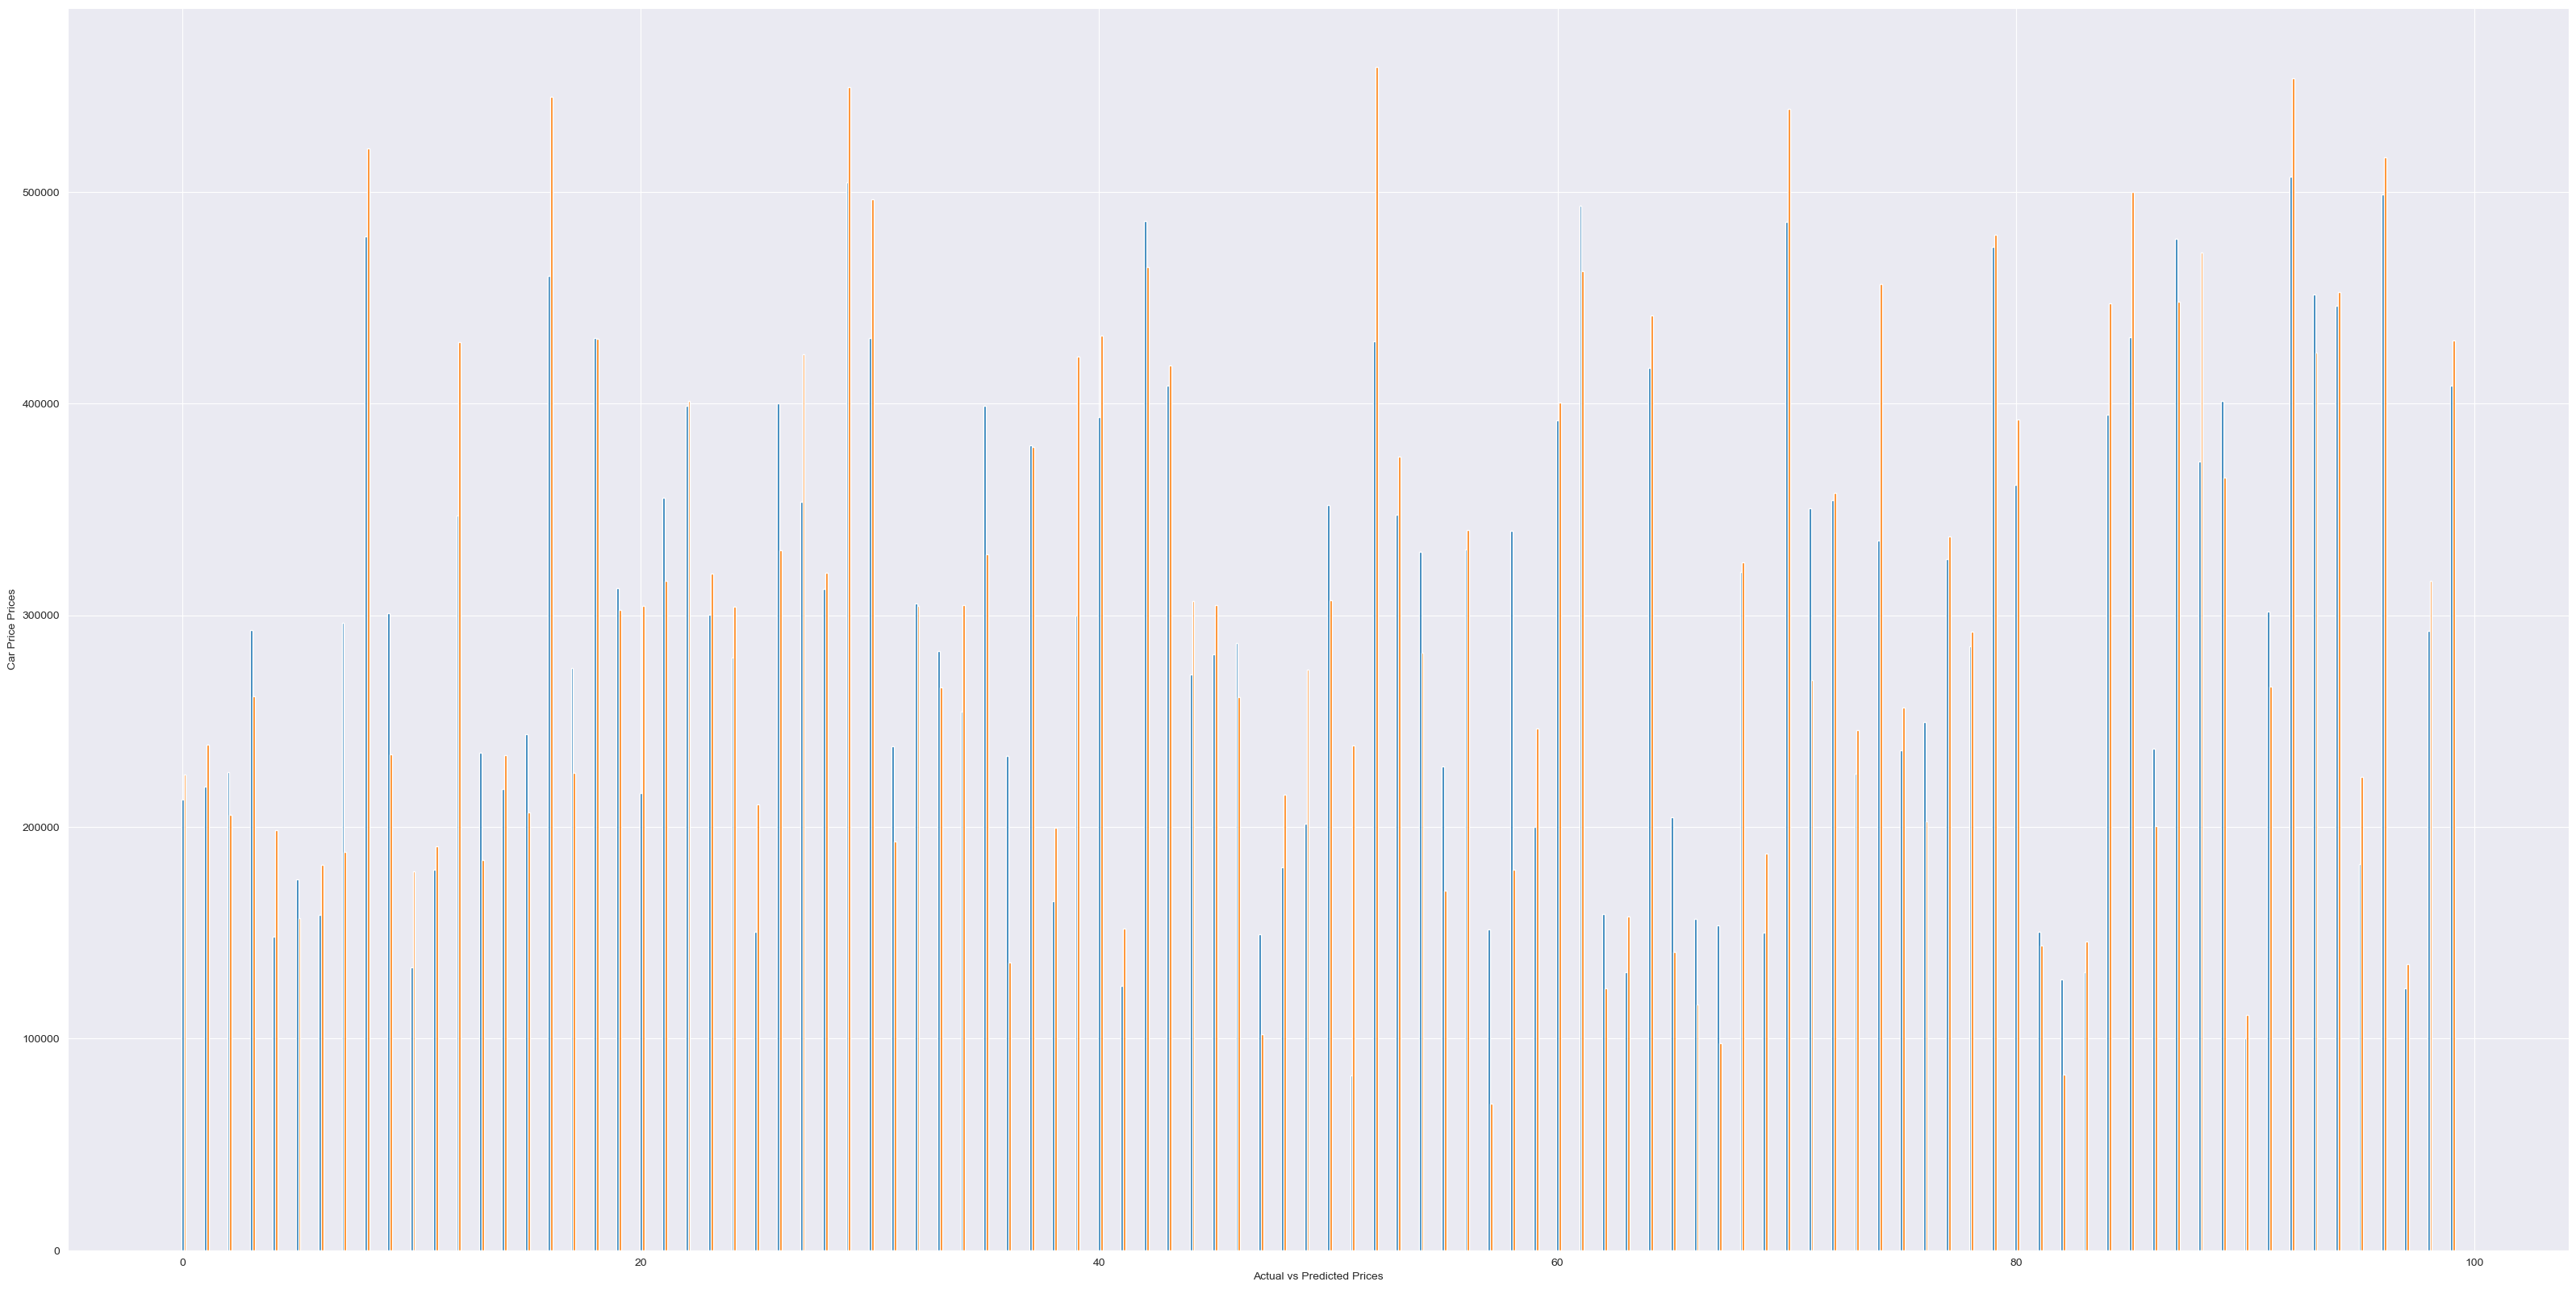

In [79]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.1

plt.bar(ind, y_pred, width, label = 'Predicted Car Price')
plt.bar(ind + width, y_true, width, label = 'Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

In [85]:
for pred, actual in zip(y_pred, y_true):
    pred = round(pred)
    actual = round(actual
                   )
    print(f"${pred:,} vs ${actual:,}")

$213,137 vs $224,745
$219,035 vs $238,941
$225,772 vs $205,716
$293,035 vs $261,732
$148,050 vs $198,503
$175,132 vs $156,826
$158,587 vs $182,220
$296,603 vs $188,186
$479,016 vs $520,660
$300,894 vs $234,142
$133,502 vs $179,077
$179,904 vs $190,744
$347,015 vs $428,956
$235,121 vs $184,571
$218,049 vs $233,987
$243,914 vs $206,836
$460,316 vs $545,171
$275,215 vs $225,670
$430,961 vs $430,452
$312,660 vs $302,423
$215,948 vs $304,354
$355,476 vs $316,184
$398,855 vs $401,120
$300,183 vs $319,728
$280,216 vs $304,104
$150,352 vs $210,662
$400,160 vs $330,908
$353,529 vs $423,232
$312,388 vs $320,008
$504,421 vs $549,406
$430,950 vs $496,514
$237,947 vs $193,067
$305,628 vs $304,445
$282,931 vs $265,955
$254,377 vs $304,924
$398,879 vs $328,974
$233,498 vs $136,079
$380,354 vs $379,491
$164,795 vs $199,798
$299,881 vs $422,417
$393,652 vs $432,160
$124,885 vs $152,126
$486,410 vs $464,634
$408,446 vs $417,940
$272,087 vs $306,660
$281,491 vs $305,002
$286,910 vs $261,568
$149,402 vs $